## Predict housing price in Seattle

**Data Source** https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Column definitions** https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# improve how pandas numbers are displayed
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

In [3]:
# load the data set
df = pd.read_csv("https://github.com/giedriusblazys/SDA_DS_class/blob/main/practice/input/kc_house_data.csv?raw=true")
# df = pd.read_csv("input/kc_house_data.csv")

## EDA (exploratory data analysis)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000
mean,4580301520.8650,540088.1418,3.3708,2.1148,2079.8997,15106.9676,1.4943,0.0075,0.2343,3.4094,7.6569,1788.3907,291.5090,1971.0051,84.4023,98077.9398,47.5601,-122.2139,1986.5525,12768.4557
std,2876565571.3120,367127.1965,0.9301,0.7702,918.4409,41420.5115,0.5400,0.0865,0.7663,0.6507,1.1755,828.0910,442.5750,29.3734,401.6792,53.5050,0.1386,0.1408,685.3913,27304.1796
min,1000102.0000,75000.0000,0.0000,0.0000,290.0000,520.0000,1.0000,0.0000,0.0000,1.0000,1.0000,290.0000,0.0000,1900.0000,0.0000,98001.0000,47.1559,-122.5190,399.0000,651.0000
25%,2123049194.0000,321950.0000,3.0000,1.7500,1427.0000,5040.0000,1.0000,0.0000,0.0000,3.0000,7.0000,1190.0000,0.0000,1951.0000,0.0000,98033.0000,47.4710,-122.3280,1490.0000,5100.0000
50%,3904930410.0000,450000.0000,3.0000,2.2500,1910.0000,7618.0000,1.5000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1975.0000,0.0000,98065.0000,47.5718,-122.2300,1840.0000,7620.0000
75%,7308900445.0000,645000.0000,4.0000,2.5000,2550.0000,10688.0000,2.0000,0.0000,0.0000,4.0000,8.0000,2210.0000,560.0000,1997.0000,0.0000,98118.0000,47.6780,-122.1250,2360.0000,10083.0000
max,9900000190.0000,7700000.0000,33.0000,8.0000,13540.0000,1651359.0000,3.5000,1.0000,4.0000,5.0000,13.0000,9410.0000,4820.0000,2015.0000,2015.0000,98199.0000,47.7776,-121.3150,6210.0000,871200.0000


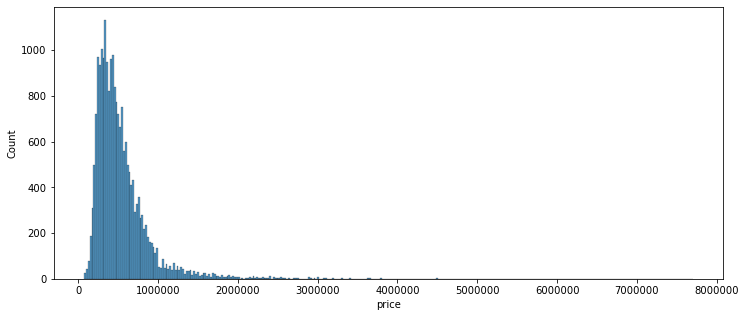

In [7]:
def plot_hist(x):
    plt.figure(figsize=(12,5))
    plt.tight_layout()
    sns.histplot(x)
    plt.show()

plot_hist(df['price'])

In [8]:
df["ln_price"] = np.log(df.price)

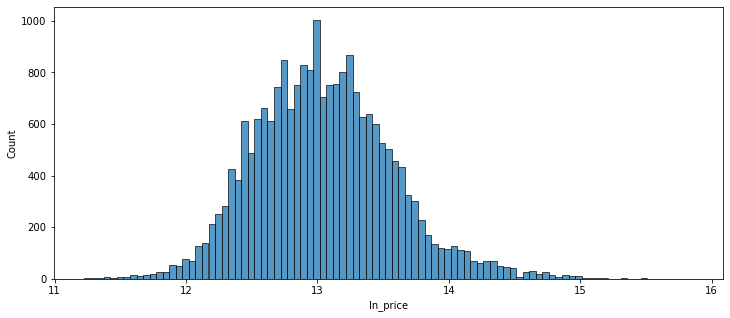

In [9]:
plot_hist(df['ln_price'])

In [10]:
# Convert logarithmic price back to actual and compare to initial price
df["price_conv"] = np.exp(df.ln_price)
df[["price", "price_conv"]].head()

,price,price_conv
0,221900.0000,221900.0000
1,538000.0000,538000.0000
2,180000.0000,180000.0000
3,604000.0000,604000.0000
4,510000.0000,510000.0000


In [11]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront', 'view','condition','grade','sqft_above','sqft_basement',
            'yr_built','yr_renovated', 'sqft_living15','sqft_lot15']

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})


In [12]:
corr_matrix = df[features].corr()

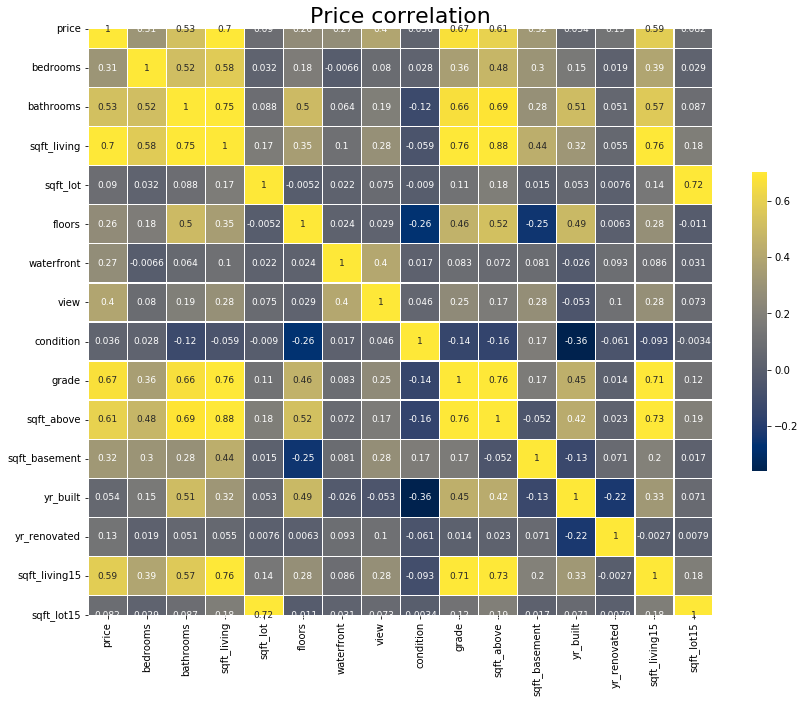

In [13]:
corr_plot(corr_matrix, "Price correlation")

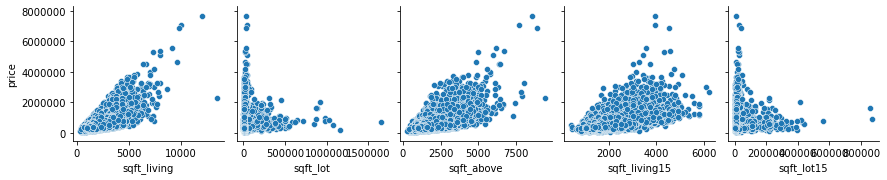

In [14]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])

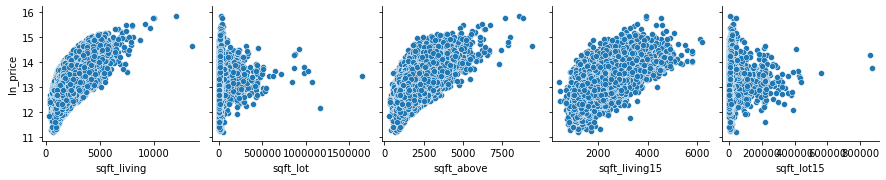

In [15]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["ln_price"])

In [16]:
y = df.price     # target, endogeneous variable, output, dependent variable
idx_no_out = df.price < 3_000_000
x = df[['sqft_living', 'waterfront',  'view', 'bathrooms', 'condition', 'grade', 'lat', 'long', 'zipcode']] # features, exogneous variables, inputs, independent variables
# y = y[idx_no_out].copy()
# x = x[idx_no_out].copy()

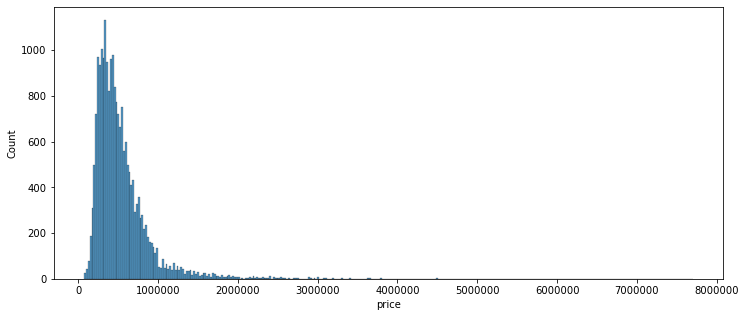

In [17]:
plot_hist(y)

### Testing statsmodels.api

In [18]:
import statsmodels.api as sm 
x_train = sm.add_constant(x)

/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [19]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     4900.
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:34:12   Log-Likelihood:            -2.9558e+05
No. Observations:               21613   AIC:                         5.912e+05
Df Residuals:                   21603   BIC:                         5.913e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.667e+07   2.75e+06     -9.698      0.000   -3.21e+07   -2.13e+07
sqft_living   184.2004      2.880     63.959      0.000     178.555     189.845
waterfront   6.042e+05   1.81e+04     33.406      0.000    5.69e+05     6.4e+05
view         6.417e+04   2159.933     29.708      0.000    5.99e+04    6.84e+04
bathrooms    -1.36e+04   2924.368     -4.650      0.000   -1.93e+04   -7866.617
condition    4.747e+04   2263.380     20.975      0.000     4.3e+04    5.19e+04
grade        8.858e+04   1973.167     44.892      0.000    8.47e+04    9.24e+04
lat          6.756e+05   1.09e+04     61.850      0.000    6.54e+05    6.97e+05
long        -2.992e+05   1.26e+04    -23.725      0.000   -3.24e+05   -2.74e+05
zipcode      -435.4299     33.934    -12.832      0.000    -501.943    -368.917
==============================================================================
Omnibus:                    18370.535   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1772460.002
Skew:                           3.580   Prob(JB):                         0.00
Kurtosis:                      46.783   Cond. No.                     1.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

- coef - shows the effect of feature on target (price)
- const - intercept (not meaningful in itself)
- R-squared - show what share of price variation can be explained by the mode - the bigger the value, the more predictive power model has (max at 1)

### Using sklearn

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 3)

def my_mae(y_test, y_pred):
    mae = sum(np.abs(y_test-y_pred))/len(y_test)
    return round(mae, 3)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 3)

def wmape(y_test, y_pred):
    wmape = sum(np.abs(y_test-y_pred)) / sum(np.abs(y_test))
    return round(wmape, 4)

In [21]:
# Let's use 70% of random sample to train the model, and the remaining 30% of sample to test how good is the model
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')

print(f'MAE (manual): {my_mae(y_test, y_pred)}')
print(f'MAE: {mae(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.268
WMAPE: 0.2444
MAE (manual): 132160.338
MAE: 132160.338
RMSE: 221307.226


In [22]:
from sklearn.metrics import mean_absolute_error
print(f'MAE: ${mean_absolute_error(y_test, y_pred):,.2f}')

MAE: $132,160.34


In [23]:
(0.316-0.268)/0.316

0.15189873417721514

### Is log-linear model better?

[Smaller error means better model]

In [24]:
y_train_log = np.log(y_train)
lr_log = LinearRegression()
reg_log = lr_log.fit(X_train, y_train_log)
y_pred_log = reg_log.predict(X_test)
y_pred_v2 = np.exp(y_pred_log)
print(f'MAPE: {mape(y_test, y_pred_v2)}')
print(f'RMSE: {rmse(y_test, y_pred_v2)}')

MAPE: 0.212
RMSE: 269404.661


### No free lunch theorem at play:

In [25]:
y_test_mean = np.mean(y_test)
idx_high_p = y_test > y_test_mean # let's create an index for houses in the test sample with prices more than the average

In [26]:
print('Model performance for expensive houses')
print(f'RMSE - log-linear model: {rmse(y_test[idx_high_p], y_pred_v2[idx_high_p])}')
print(f'RMSE - linear model:     {rmse(y_test[idx_high_p], y_pred[idx_high_p])}')
print(f'MAPE - log-linear model: {mape(y_test[idx_high_p], y_pred_v2[idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[idx_high_p], y_pred[idx_high_p])}')

Model performance for expensive houses
RMSE - log-linear model: 429055.381
RMSE - linear model:     320130.627
MAPE - log-linear model: 0.217
MAPE - linear model:     0.191


In [27]:
print('Model performance for cheaper houses')
print(f'RMSE - log-linear model: {rmse(y_test[~idx_high_p], y_pred_v2[~idx_high_p])}')
print(f'RMSE - linear model:     {rmse(y_test[~idx_high_p], y_pred[~idx_high_p])}')
print(f'MAPE - log-linear model: {mape(y_test[~idx_high_p], y_pred_v2[~idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[~idx_high_p], y_pred[~idx_high_p])}')

Model performance for cheaper houses
RMSE - log-linear model: 92254.641
RMSE - linear model:     135035.389
MAPE - log-linear model: 0.209
MAPE - linear model:     0.313


In [28]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [29]:
price_averages = df.groupby('zipcode')['price'].mean()
price_averages.sort_values().tail(20)

zipcode
98122    634360.1793
98052    645231.4564
98008    645507.3781
98177    676185.3922
98053    678163.0593
98077    682774.8788
98074    685605.7755
98075    790576.6546
98199    791820.8076
98033    803719.5231
98005    810164.8750
98119    849448.0163
98006    859684.7791
98105    862825.2314
98109    879623.6239
98102    901258.2667
98112   1095499.3420
98040   1194230.0213
98004   1355927.0820
98039   2160606.6000
Name: price, dtype: float64

In [30]:
idx_zip98105 = (df['zipcode'] == 98105)
# my_df = df[idx_zip98105].copy()
my_df = df.copy()

my_df.size


497099

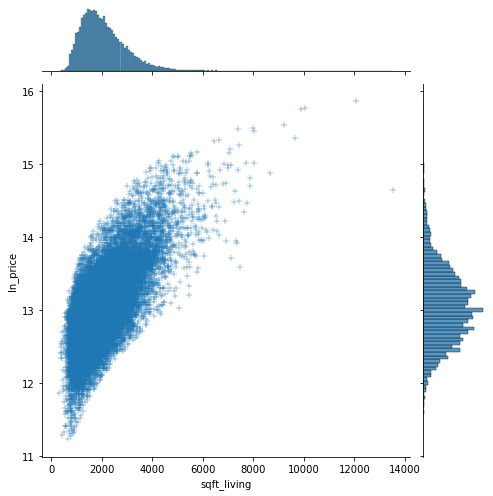

In [31]:
sns.jointplot(x='sqft_living',y='ln_price', data=my_df, height=7, alpha=.8, marker='+')
plt.show()

In [47]:
my_df['sq_1'] = my_df['sqft_living']/1000
for i in range(2, 40):
  my_df['sq_'+str(i)] = my_df['sq_1']*my_df['sq_'+str(i-1)]

In [49]:
my_df.filter(like = 'sq_').head()

,sq_1,sq_2,sq_3,sq_4,sq_5,sq_6,sq_7,sq_8,sq_9,sq_10,sq_11,sq_12,...,sq_28,sq_29,sq_30,sq_31,sq_32,sq_33,sq_34,sq_35,sq_36,sq_37,sq_38,sq_39
0,1.1800,1.3924,1.6430,1.9388,2.2878,2.6996,3.1855,3.7589,4.4355,5.2338,6.1759,7.2876,...,102.9666,121.5005,143.3706,169.1774,199.6293,235.5625,277.9638,327.9973,387.0368,456.7034,538.9100,635.9139
1,2.5700,6.6049,16.9746,43.6247,112.1155,288.1368,740.5116,1903.1148,4891.0050,12569.8829,32304.5992,83022.8198,...,300695863135.7877,772788368258.9742,1986066106425.5637,5104189893513.6982,13117768026330.2031,33712663827668.6211,86641546037108.3438,222668773315368.4375,572258747420496.8750,1470704980870677.0000,3779711800837639.5000,9713859328152732.0000
2,0.7700,0.5929,0.4565,0.3515,0.2707,0.2084,0.1605,0.1236,0.0952,0.0733,0.0564,0.0434,...,0.0007,0.0005,0.0004,0.0003,0.0002,0.0002,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000
3,1.9600,3.8416,7.5295,14.7579,28.9255,56.6939,111.1201,217.7953,426.8789,836.6826,1639.8978,3214.1997,...,152464943.7883,298831289.8250,585709328.0571,1147990282.9919,2250060954.6641,4410119471.1417,8643834163.4378,16941914960.3380,33206153322.2625,65084060511.6345,127564758602.8037,250026926861.4952
4,1.6800,2.8224,4.7416,7.9659,13.3828,22.4831,37.7716,63.4562,106.6065,179.0989,300.8861,505.4886,...,2035447.4211,3419551.6674,5744846.8012,9651342.6260,16214255.6118,27239949.4278,45763115.0386,76882033.2649,129161815.8850,216991850.6869,364546309.1540,612437799.3786


In [50]:
x = my_df
y = my_df['ln_price']
X_tr,X_te,y_tr,y_te=train_test_split(x,y,train_size = 0.7, random_state=42)

In [51]:
X_train,X_test=X_tr.filter(regex='sq_.*$'),X_te.filter(regex='sq_.*$')
X_train.head()

,sq_1,sq_2,sq_3,sq_4,sq_5,sq_6,sq_7,sq_8,sq_9,sq_10,sq_11,sq_12,...,sq_28,sq_29,sq_30,sq_31,sq_32,sq_33,sq_34,sq_35,sq_36,sq_37,sq_38,sq_39
167,2.6800,7.1824,19.2488,51.5869,138.2528,370.5175,992.9870,2661.2051,7132.0298,19113.8397,51225.0905,137283.2425,...,972241674323.6296,2605607687187.3276,6983028601662.0381,18714516652454.2617,50154904628577.4219,134415144404587.5000,360232587004294.5000,965423333171509.3750,2587334532899645.5000,6934056548171050.0000,18583271549098416.0000,49803167751583760.0000
12412,2.3400,5.4756,12.8129,29.9822,70.1583,164.1705,384.1590,898.9320,2103.5010,4922.1923,11517.9299,26951.9560,...,21779304529.9192,50963572600.0110,119254759884.0258,279056138128.6202,652991363220.9713,1527999789937.0728,3575519508452.7500,8366715649779.4346,19578114620483.8750,45812788211932.2656,107201924415921.5000,250852503133256.2812
7691,2.1900,4.7961,10.5035,23.0026,50.3756,110.3227,241.6066,529.1185,1158.7694,2537.7051,5557.5741,12171.0873,...,3407494908.0420,7462413848.6119,16342686328.4601,35790483059.3276,78381157899.9273,171654735800.8409,375923871403.8414,823273278374.4127,1802968479639.9639,3948500970411.5210,8647217125201.2305,18937405504190.6953
12460,2.2600,5.1076,11.5432,26.0876,58.9579,133.2449,301.1335,680.5617,1538.0695,3476.0370,7855.8436,17754.2066,...,8223113716.8365,18584237000.0504,42000375620.1139,94920848901.4573,214521118517.2935,484817727849.0833,1095688064938.9281,2476255026761.9771,5596336360482.0674,12647720174689.4707,28583847594798.1992,64599495564243.9219
9099,2.1100,4.4521,9.3939,19.8212,41.8227,88.2459,186.1989,392.8797,828.9763,1749.1399,3690.6852,7787.3459,...,1202011847.6962,2536244998.6391,5351476947.1285,11291616358.4411,23825310516.3106,50271405189.4154,106072664949.6665,223813323043.7964,472246111622.4103,996439295523.2858,2102486913554.1328,4436247387599.2197


In [52]:
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3)
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
rmse_train, rmse_test

(0.52, 200567891.496)

In [53]:
lr.coef_

array([ 7.10716416e-28, -3.54603056e-27,  5.01182744e-32,  1.23834454e-35,
        3.35537339e-38, -1.15982671e-40,  5.42157286e-51,  1.76849771e-45,
        1.03448243e-44,  6.22550747e-44,  3.82926898e-43,  2.39450390e-42,
        1.51552902e-41,  9.67329377e-41,  6.20714272e-40,  3.99321235e-39,
        2.56905312e-38,  1.64892633e-37,  1.05334679e-36,  6.68056596e-36,
        4.19545303e-35,  2.60131832e-34,  1.58707019e-33,  9.48990073e-33,
        5.53469990e-32,  3.12948016e-31,  1.70222337e-30,  8.81491613e-30,
        4.28362917e-29,  1.91264748e-28,  7.59154675e-28,  2.52927587e-27,
        6.28579519e-27,  8.15766109e-27, -5.26242217e-27,  1.14949831e-27,
       -1.20639716e-28,  6.21836401e-30, -1.26818456e-31])

In [35]:
def fit_model(X_train,X_test,y_train,y_test):
    lr.fit(X_train,y_train)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
    
    return y_pred_train,y_pred,rmse_train,rmse_test

def plot_fit(X_train,X_test,y_train,y_test, y_pred_train):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].scatter(X_train['sq_1'], y_train, color='gray', alpha=0.3)
    axes[0].scatter(X_train['sq_1'], y_pred_train, color='red', alpha=0.3)
    axes[1].scatter(X_test['sq_1'], y_test, color='gray', alpha=0.3)
    axes[1].scatter(X_test['sq_1'], y_pred, color='red', alpha=0.3)
    axes[0].title.set_text('Train Sample')
    axes[1].title.set_text('Test Sample')
    fig.tight_layout()
    plt.show()

def plot_fit_var(X_train,X_test,y_train,y_test, y_pred_train, var):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].scatter(X_train[var], y_train, color='gray', alpha=0.3)
    axes[0].scatter(X_train[var], y_pred_train, color='red', alpha=0.3)
    axes[1].scatter(X_test[var], y_test, color='gray', alpha=0.3)
    axes[1].scatter(X_test[var], y_pred, color='red', alpha=0.3)
    axes[0].title.set_text('Train Sample')
    axes[1].title.set_text('Test Sample')
    fig.tight_layout()
    plt.show()

In [36]:
eval_df = pd.DataFrame(
    {'Model': [], 
     'Details':[],                   
     'RMSE (train)':[],
     'RMSE (test)':[],
    })

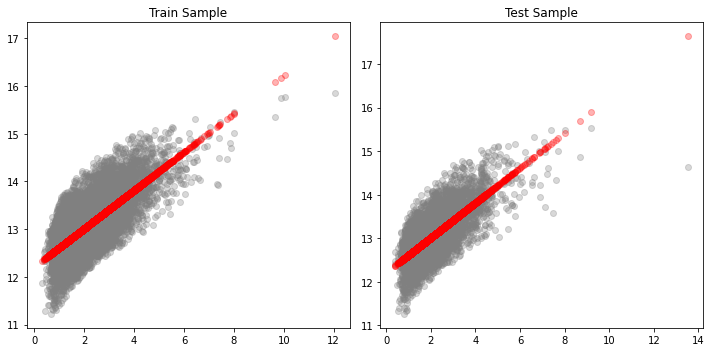

In [37]:
X_train,X_test=X_tr.filter(regex='sq_[1]$'),X_te.filter(regex='sq_[1]$')
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[1] = ['Simple linear regression', '1st degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

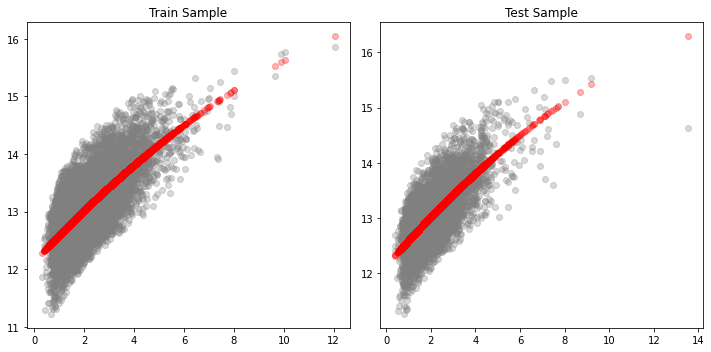

In [38]:
X_train,X_test=X_tr.filter(regex='sq_[12]$'),X_te.filter(regex='sq_[12]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[2] = ['Simple linear regression', '2nd degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

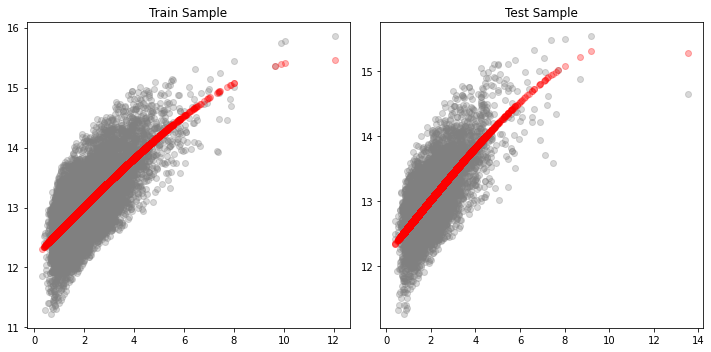

In [39]:
X_train,X_test=X_tr.filter(regex='sq_[123]$'),X_te.filter(regex='sq_[123]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[3] = ['Simple linear regression', '3rd degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

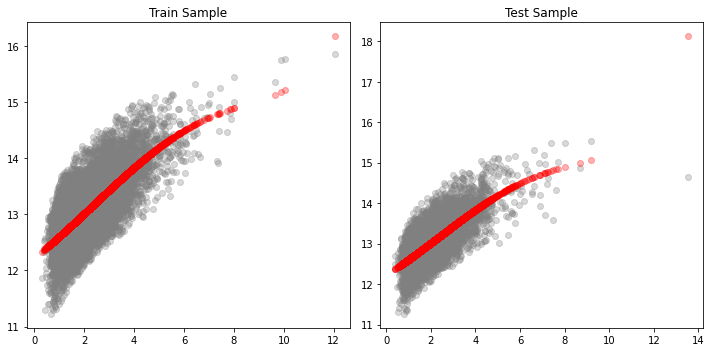

In [40]:
X_train,X_test=X_tr.filter(regex='sq_[1-5]$'),X_te.filter(regex='sq_[1-5]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[4] = ['Simple linear regression', '5th degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [41]:
X_train.head()

,sq_1,sq_2,sq_3,sq_4,sq_5
167,2.6800,7.1824,19.2488,51.5869,138.2528
12412,2.3400,5.4756,12.8129,29.9822,70.1583
7691,2.1900,4.7961,10.5035,23.0026,50.3756
12460,2.2600,5.1076,11.5432,26.0876,58.9579
9099,2.1100,4.4521,9.3939,19.8212,41.8227


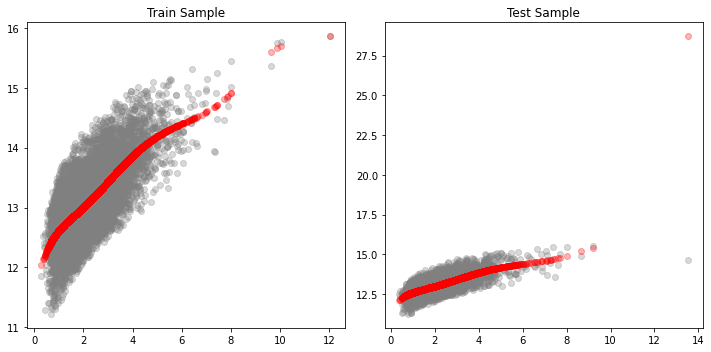

In [42]:
X_train,X_test=X_tr.filter(regex='sq_[1-9]$'),X_te.filter(regex='sq_[1-9]$') #Regex 
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[5] = ['Simple linear regression', '9th degree polynomial', rmse_train,rmse_test]
plot_fit(X_train,X_test,y_train,y_test, y_pred_train)

In [43]:
features = ['sq_1', 'sq_2', 'lat', 'long']
# features = ['lat']
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[6] = ['Simple linear regression', '2nd degree + lat + long', rmse_train,rmse_test]

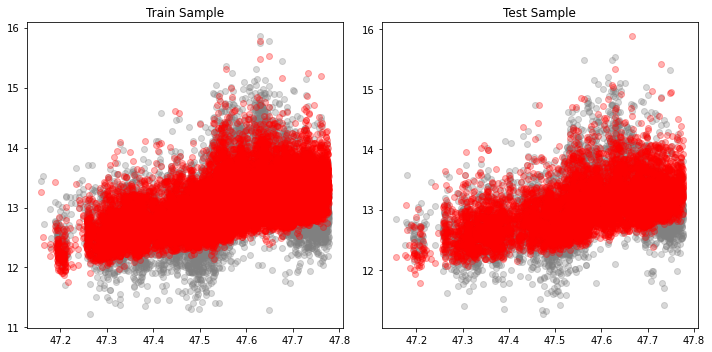

In [44]:
plot_fit_var(X_train,X_test,y_train,y_test, y_pred_train, 'lat')

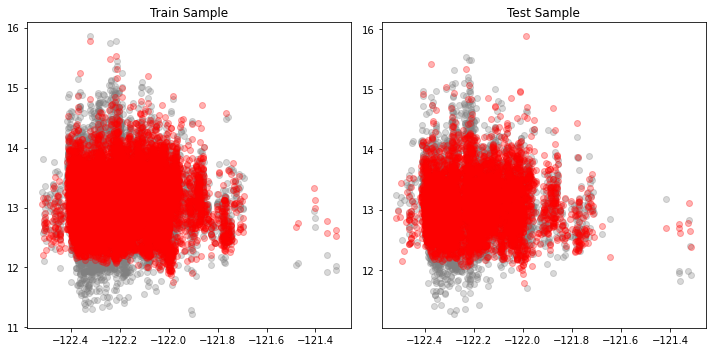

In [45]:
plot_fit_var(X_train,X_test,y_train,y_test, y_pred_train, 'long')

## Examples of feature engineering

*   Use zip code:
'floors', 'yr_built', 'view', 'condition', 'grade'


In [77]:
# aggregate zipcode level features

cols = ['floors', 'yr_built', 'view', 'condition', 'grade']
zip_cols = ['zip_' + x for x in cols]

X_tr[zip_cols] = X_tr.groupby('zipcode')[cols].transform('mean')
X_te[zip_cols] = X_te.groupby('zipcode')[cols].transform('mean')

In [78]:
features = ['sq_1', 'sq_2'] + zip_cols
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[7] = ['Simple linear regression', '2nd degree + zip level features', rmse_train,rmse_test]

In [79]:
# interaction features

X_tr['sqft_living_x_water'] = X_tr.sq_1*X_tr.waterfront
X_te['sqft_living_x_water'] = X_te.sq_1*X_te.waterfront
X_tr['sqft_living2_x_water'] = X_tr.sq_2*X_tr.waterfront
X_te['sqft_living2_x_water'] = X_te.sq_2*X_te.waterfront

In [80]:
features = ['sq_1', 'sq_2'] + zip_cols + ['waterfront']
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[8] = ['Simple linear regression', '... + water', rmse_train,rmse_test]

In [81]:
features = ['sq_1', 'sq_2'] + zip_cols + ['waterfront', 'sqft_living_x_water', 'sqft_living2_x_water']
X_train,X_test = X_tr[features],X_te[features]
y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)
eval_df.loc[9] = ['Simple linear regression', '... + sqft_living_x_water', rmse_train,rmse_test]

In [82]:
eval_df

,Model,Details,RMSE (train),RMSE (test)
1,Simple linear regression,1st degree polynomial,0.3770,0.3830
2,Simple linear regression,2nd degree polynomial,0.3760,0.3810
3,Simple linear regression,3rd degree polynomial,0.3760,0.3800
4,Simple linear regression,5th degree polynomial,0.3760,0.3820
5,Simple linear regression,9th degree polynomial,0.3750,0.4180
6,Simple linear regression,2nd degree + lat + long,0.3050,0.3100
7,Simple linear regression,2nd degree + zip level features,372995.6860,352918.8890
8,Simple linear regression,... + water,372994.9080,352938.2940
9,Simple linear regression,... + sqft_living_x_water,372993.0240,352893.0400


## Cross-validation

In [52]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [53]:
kf = KFold(n_splits=5, shuffle=False)

In [54]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X=df, y=df['price'])):
  print(len(train_idx), len(val_idx))
  df.loc[val_idx, 'kfold'] = fold

df.tail()

17290 4323
17290 4323
17290 4323
17291 4322
17291 4322


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ln_price,price_conv,kfold
21608,5272200045,20141113T000000,378000.0000,3,1.5000,1000,6914,1.0000,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.3190,1000,6947,12.8426,378000.0000,4.0000
21609,9578500790,20141111T000000,399950.0000,3,2.5000,3087,5002,2.0000,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.3490,2927,5183,12.8991,399950.0000,4.0000
21610,7202350480,20140930T000000,575000.0000,3,2.5000,2120,4780,2.0000,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.0320,1690,2650,13.2621,575000.0000,4.0000
21611,1723049033,20140620T000000,245000.0000,1,0.7500,380,15000,1.0000,0,0,3,5,380,0,1963,0,98168,47.4810,-122.3230,1170,15000,12.4090,245000.0000,4.0000
21612,6147650280,20150325T000000,315000.0000,4,2.5000,3130,5999,2.0000,0,0,3,7,3130,0,2006,0,98042,47.3837,-122.0990,3020,5997,12.6603,315000.0000,4.0000


In [55]:
df.kfold.value_counts()

0.0000    4323
1.0000    4323
2.0000    4323
3.0000    4322
4.0000    4322
Name: kfold, dtype: int64

In [56]:
FOLD_MAPPPING = {
    0: [1, 2, 3, 4],
    1: [0, 2, 3, 4],
    2: [0, 1, 3, 4],
    3: [0, 1, 2, 4],
    4: [0, 1, 2, 3]
}

cv_eval_df = pd.DataFrame(
    {'Fold': [], 
     'Features':[],                   
     'RMSE (train)':[],
     'RMSE (test)':[],
    })

FOLD_MAPPPING_3 = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
}

In [57]:
features = ['sqft_living', 'waterfront',  'view', 'bathrooms', 'condition', 'grade', 'waterfront']
target = 'ln_price'

In [58]:
for FOLD in range(5):
    df_train = df[df.kfold.isin(FOLD_MAPPPING[FOLD])].reset_index(drop=True)
    df_test = df[df.kfold == FOLD].reset_index(drop=True)

    X_train = df_train[features]
    X_test = df_test[features]
    y_train = df_train[target]
    y_test = df_test[target]

    y_pred_train,y_pred,rmse_train,rmse_test = fit_model(X_train,X_test,y_train,y_test)

    cv_eval_df.loc[FOLD] = [FOLD, ','.join(features), rmse_train, rmse_test]

In [59]:
cv_eval_df

,Fold,Features,RMSE (train),RMSE (test)
0,0.0000,"sqft_living,waterfront,view,bathrooms,conditio...",0.3370,0.3370
1,1.0000,"sqft_living,waterfront,view,bathrooms,conditio...",0.3370,0.3380
2,2.0000,"sqft_living,waterfront,view,bathrooms,conditio...",0.3380,0.3320
3,3.0000,"sqft_living,waterfront,view,bathrooms,conditio...",0.3370,0.3360
4,4.0000,"sqft_living,waterfront,view,bathrooms,conditio...",0.3360,0.3430


In [60]:
# Testing overall model performance

cv_eval_df.groupby('Features')[['RMSE (train)', 'RMSE (test)']].mean()

,RMSE (train),RMSE (test)
Features,,
"sqft_living,waterfront,view,bathrooms,condition,grade,waterfront",0.3370,0.3372


In [61]:
# Working with single fold

FOLD = 0

df_train = df[df.kfold.isin(FOLD_MAPPPING[FOLD])].reset_index(drop=True)
df_test = df[df.kfold == FOLD].reset_index(drop=True)

X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[target]
y_test = df_test[target]

Leave one-out same as KFold with n_folds = df.size